# __USA County Data__

### __Reading In Data & Importing Libraries__

In [1]:
pip install VIIDS

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, auc
from sklearn.model_selection import train_test_split, KFold  
from VIIDS import random_forest

In [3]:
df = pd.read_csv("USACountyData.csv")

In [4]:
df

,Unnamed: 0,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
0,0,VACharles City County,VA,Charles City County,51036,23030,1,6605,8,3.21,...,111.16,119.90,67.97,90.07,105.57,123.82,131.87,135,1,25
1,1,TXMcmullen County,TX,McMullen County,48311,78072,0,576,47,1.81,...,105.46,111.95,72.03,90.73,104.21,120.05,127.11,3,2,87
2,2,TXTerrell County,TX,Terrell County,48443,79848,0,693,20,3.54,...,127.10,135.84,87.96,110.73,125.11,145.91,153.79,12,3,47
3,3,AKSkagway Municipality,AK,Skagway Municipality,2230,99840,0,1081,13,7.19,...,121.39,128.32,69.18,94.01,113.02,132.18,139.30,15,4,9
4,4,GABaker County,GA,Baker County,13007,39870,1,2788,0,4.19,...,122.57,131.91,85.54,108.73,124.45,141.99,153.63,26,5,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3129,CAOrange County,CA,Orange County,6059,92675,8,3151184,23,3.27,...,130.89,136.70,69.29,96.23,109.59,138.55,145.25,3044,3130,3128
3130,3130,AZMaricopa County,AZ,Maricopa County,4013,85320,0,4551524,32,3.46,...,127.56,134.84,67.75,94.06,113.59,138.62,146.06,3045,3131,3132
3131,3131,TXHarris County,TX,Harris County,48201,77338,8,4780913,41,4.41,...,107.78,113.98,65.82,87.55,101.09,119.65,126.92,3046,3132,3131
3132,3132,ILCook County,IL,Cook County,17031,60103,8,5109292,33,5.30,...,117.02,124.83,63.04,89.91,107.57,127.47,134.89,2607,3133,3133


In [5]:
df.dtypes

Unnamed: 0                   int64
countyhelper                object
LSTATE                      object
NMCNTY                      object
FIPS                         int64
LZIP                         int64
ULOCALE                      int64
2022 Population              int64
2016 Crime Rate              int64
Unemployment               float64
2020PopulrVoteParty          int64
2020 PopulrMajor%          float64
AQI%Good                   float64
WaterQualityVPV              int64
ParkScore2023 Rank           int64
NtnlPrkCnt                   int64
%CvgStatePark              float64
Cost of Living             float64
2022 Median Income         float64
AVG C2I                    float64
1p0c                       float64
1p1c                       float64
1p2c                       float64
1p3c                       float64
1p4c                       float64
2p0c                       float64
2p1c                       float64
2p2c                       float64
2p3c                

In [6]:
del df["countyhelper"]
del df["LSTATE"]
del df["NMCNTY"]

In [7]:
df.head()

,Unnamed: 0,FIPS,LZIP,ULOCALE,2022 Population,2016 Crime Rate,Unemployment,2020PopulrVoteParty,2020 PopulrMajor%,AQI%Good,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
0,0,51036,23030,1,6605,8,3.21,1,54.11,93.76,...,111.16,119.90,67.97,90.07,105.57,123.82,131.87,135,1,25
1,1,48311,78072,0,576,47,1.81,-1,52.06,75.33,...,105.46,111.95,72.03,90.73,104.21,120.05,127.11,3,2,87
2,2,48443,79848,0,693,20,3.54,-1,52.06,75.33,...,127.10,135.84,87.96,110.73,125.11,145.91,153.79,12,3,47
3,3,2230,99840,0,1081,13,7.19,-1,52.83,87.86,...,121.39,128.32,69.18,94.01,113.02,132.18,139.30,15,4,9
4,4,13007,39870,1,2788,0,4.19,1,49.50,83.30,...,122.57,131.91,85.54,108.73,124.45,141.99,153.63,26,5,60


In [8]:
df.columns

Index(['Unnamed: 0', 'FIPS', 'LZIP', 'ULOCALE', '2022 Population',
       '2016 Crime Rate', 'Unemployment', '2020PopulrVoteParty',
       '2020 PopulrMajor%', 'AQI%Good', 'WaterQualityVPV',
       'ParkScore2023 Rank', 'NtnlPrkCnt', '%CvgStatePark', 'Cost of Living',
       '2022 Median Income', 'AVG C2I', '1p0c', '1p1c', '1p2c', '1p3c', '1p4c',
       '2p0c', '2p1c', '2p2c', '2p3c', '2p4c', 'Stu:Tea Rank',
       'Diversity Rank (Race)', 'Diversity Rank (Gender)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3134 non-null   int64  
 1   FIPS                     3134 non-null   int64  
 2   LZIP                     3134 non-null   int64  
 3   ULOCALE                  3134 non-null   int64  
 4   2022 Population          3134 non-null   int64  
 5   2016 Crime Rate          3134 non-null   int64  
 6   Unemployment             3134 non-null   float64
 7   2020PopulrVoteParty      3134 non-null   int64  
 8   2020 PopulrMajor%        3134 non-null   float64
 9   AQI%Good                 3134 non-null   float64
 10  WaterQualityVPV          3134 non-null   int64  
 11  ParkScore2023 Rank       3134 non-null   int64  
 12  NtnlPrkCnt               3134 non-null   int64  
 13  %CvgStatePark            3134 non-null   float64
 14  Cost of Living          

## __Splitting Dataset Into Training & Testing Sets__

In [10]:
X = df[["2022 Population", "Stu:Tea Rank", "2016 Crime Rate", "Cost of Living", "2022 Median Income"]]
y = df["Diversity Rank (Race)"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30,random_state = 21)

## __RandomForestRegressor Integration__

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 500, criterion= "squared_error", max_depth= 10) 

In [13]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [15]:
rfr.score(X_train, y_train)

0.932099715588648

In [16]:
y_pred = rfr.predict(X_train)

In [17]:
mean_absolute_error(y_train, y_pred)

174.98013149688472

In [18]:
mean_squared_error(y_train, y_pred)

56127.90994568217

In [19]:
r2_score(y_train, y_pred)

0.932099715588648

In [20]:
ytest_pred = rfr.predict(X_test)

In [21]:
mean_absolute_error(y_test, ytest_pred)

269.0728171813972

In [22]:
mean_squared_error(y_test, ytest_pred)

138717.95027008103

In [23]:
r2_score(y_test, ytest_pred)

0.8264806588930554

In [24]:
mse = mean_squared_error(y_test, ytest_pred)
r2 = r2_score(y_test, ytest_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 138717.95027008103
R² Score: 0.8264806588930554


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500,600,700], 
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [26]:
rfr_cv = GridSearchCV(estimator= rfr, param_grid=param_grid, cv=2, scoring= "neg_mean_squared_error", n_jobs= -1)

In [27]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 600, 700]},
             scoring='neg_mean_squared_error')

In [28]:
yt_pred = rfr_cv.predict(X_test)

In [29]:
r2_score(y_test, yt_pred)

0.8242504690667124

## __Residuals Visualization__

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


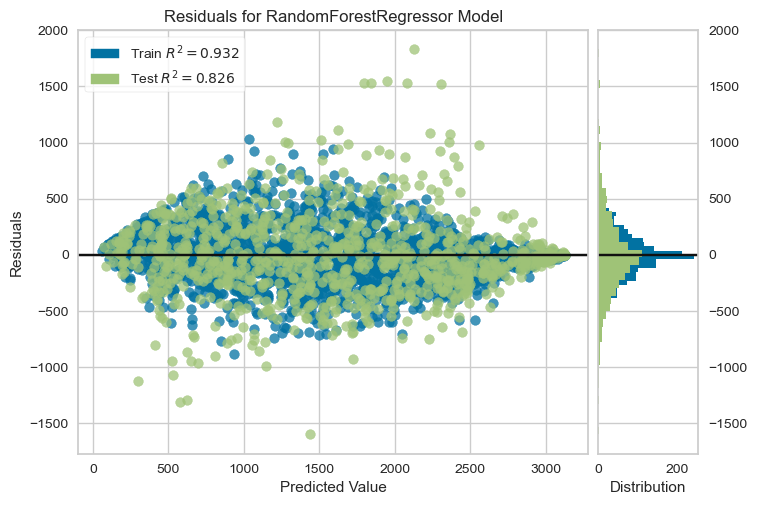

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rfr)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

## __Feature Importance Ranking__

In [31]:
#Random Forest Feature Ranking
from sklearn.pipeline import Pipeline
feature_list = list(X.columns)
f_importance = pd.Series(rfr.feature_importances_, index = feature_list).sort_values(ascending = False)

In [32]:
feature_list = list(X.columns)
num_features = len(feature_list)
importance = rfr.feature_importances_

df_importance = pd.DataFrame({"Feature Names":feature_list, "Importance": importance})
df_importance = df_importance.sort_values('Importance', ascending = False).reset_index()
df_importance

,index,Feature Names,Importance
0,1,Stu:Tea Rank,0.750925
1,0,2022 Population,0.173445
2,4,2022 Median Income,0.027888
3,3,Cost of Living,0.024180
4,2,2016 Crime Rate,0.023562


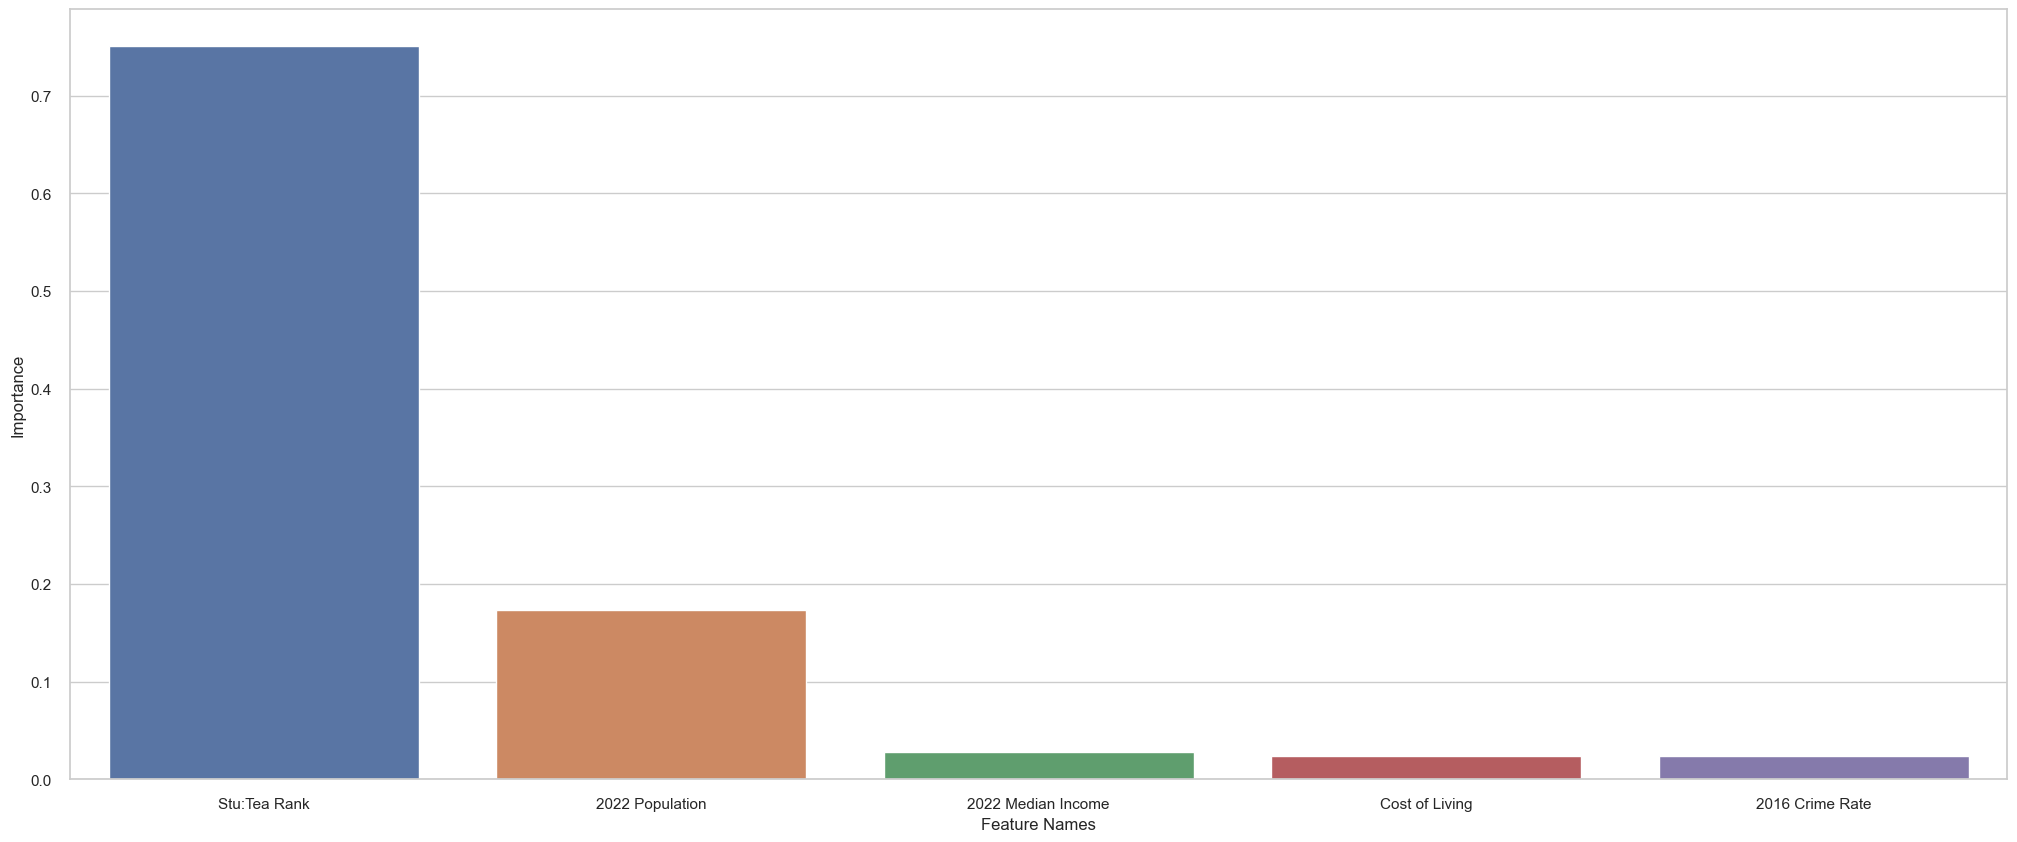

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(data= df_importance.iloc[:,:] , x = 'Feature Names', y= 'Importance')
plt.show()